
# HR Analytics Project- Understanding the Attrition in HR
# Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

# HR Analytics:

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

# Attrition in HR:

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

# Attrition affecting Companies:

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from  sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor


import warnings
warnings.filterwarnings('ignore')

In [2]:
#READ THE DATASET


df=pd.read_csv('C:/Users/HP/Desktop/data sets/WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.tail(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


- Attriton means when there is a reduction in workforce in a company.In this data set we can see several major factors of employees of IBM recorded by the human resource department.the main target column is the Attrition,which is classified as yes or no.we have to predict an employee will be in attrition or not with the features given in this dataset.Thus this a classification problem,we will usee different classifier models to predict the actual attrition in IBM.The data set is comprised of both continuous and categorical datas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Mainly the dataset is comprised of integer and object type features.
- The integer type features are:Age,DailyRate,EmployeeCount,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement, JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfactionion,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.
- The object type features are-Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime.



In [5]:
df.shape

(1470, 35)

- There are total 1470 rows and 35 columns in this dataset.

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

- Mainly the dataset is comprised of integer and object type features.
- The integer type features are:Age,DailyRate,EmployeeCount,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement, JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfactionion,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager.
- The object type features are-Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime.

In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

- Found out all the column names of the dataset.

In [8]:
#CHECKING IS THERE ANY NULL VALUES

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

- There is no null values in the dataset.

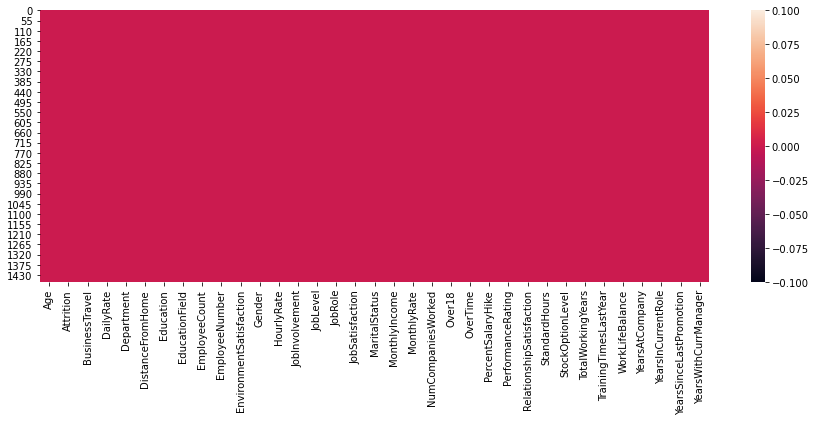

In [9]:
#Checking null values by heatmap
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull())
plt.show()

- There is no null values in the dataset.

In [10]:
# Statistical Summary
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


- The count values of the features are same ,that means there isno null values in the dataset.
- Maximum age is 60and minimum is 18.
- Maximum Daily rate is 1499 and minimum is 102.0
- There are 2068 employees.
- the maximum hourly rate is 100 and the minimum hourly rate is 30.
- The lowest monthly income is 1009 and the highst monthly income is 19999.
- The lowest monthly rate is 2094, and the highest monthly rate is 26999.
- the lowest percentage salary hike is 11% and the highest percentage salary hike is 25%.
- Employee count no may be same in values,because it is showing 1.0 through all the columns above.
- There may be skewness in some columns because the diff between the mean and standard deviation is high.
- The interquartlie ranges are mostly equal in the columns.

- # EDA:
    
- # UNIVARIATE ANALYSIS:

In [11]:
#checking unique values in target variable in column "Attrition"

df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

- There are two types of class in Attrition column,they are Yes and No.

In [12]:
#counting the target variable

df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

- Attrition NO have higher values 1233 than Attrition Yes valus that is 237.

Text(0.5, 1.0, 'yes/no')

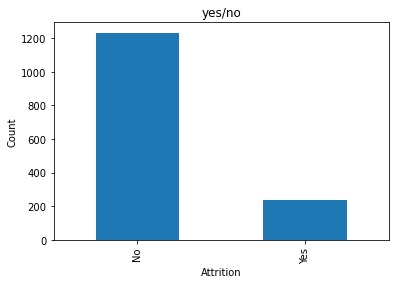

In [13]:
#is the data balanced?

plt.figure()
pd.Series(df['Attrition']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Attrition")
plt.title("yes/no")

- The class yes and no is not balanced,we will balance by oversampling the yes class latter by using SMOTE.

In [14]:
#checking unique values in target variable in column "Gender"

df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Two types of Gender :
- Male
-Female.

In [15]:
#counting the Gender Column

df['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

- Male employees are higher than the female employees.

<AxesSubplot:xlabel='Gender', ylabel='count'>

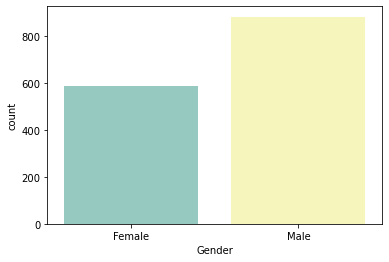

In [16]:
sns.countplot(df['Gender'],palette='Set3')

- Male employees are higher than the female employees.

In [17]:
#counting the Department Variable

df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

There are three departments they are:
- Research & Development.
- Sales
- Human Resources.
- The employees in Research & Development is highest and the employees in Human Resources is lowest.
    

<AxesSubplot:xlabel='Department', ylabel='count'>

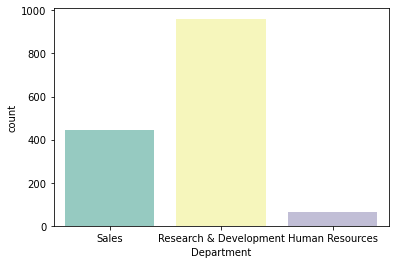

In [18]:
sns.countplot(df['Department'],palette='Set3')

- The employees in Research & Development is highest and the employees in Human Resources is lowest.

In [19]:
#counting the BusinessTravel Variable

df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

- The employees travel layer is largest which is 1043 employees and non-trave are lowest which is 150 employees.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

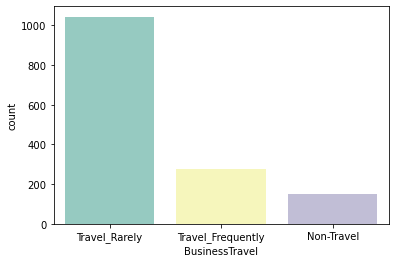

In [20]:
sns.countplot(df['BusinessTravel'],palette='Set3')

- The employees travel layer is largest which is 1043 employees and non-trave are lowest which is 150 employees.

In [21]:
#counting the Age Variable

df['Age'].value_counts()

35    78
34    77
31    69
36    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
46    33
44    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
48    19
51    19
53    19
52    18
54    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: Age, dtype: int64

- we found differnt age group works in the company.

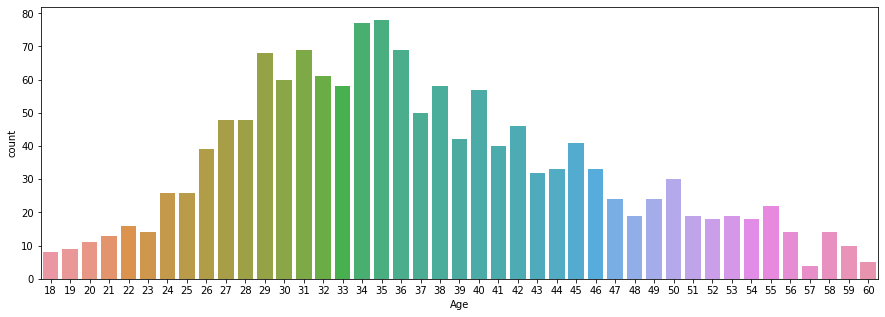

In [22]:
# Plotting Age column 
plt.figure(figsize=(15,5))
sns.countplot('Age',data=df)
plt.show()

- The minimum age is 18 of an employee and the maximum age is 60 of an employee.
- The people on the age group 35 is highest in number and the people in the age group 57 is lowest in number.

In [23]:
#counting the Age Variable

df['EmployeeCount'].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

- There are total 1470 employee details in the dataset.

In [24]:
#counting the Age Variable

df['EmployeeNumber'].value_counts().all

<bound method Series.all of 2046    1
641     1
644     1
645     1
647     1
       ..
1364    1
1367    1
1368    1
1369    1
2048    1
Name: EmployeeNumber, Length: 1470, dtype: int64>

The length of the EmployeeNumber is 1470,that means Employe number is a unique code or serial number given to each employee.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

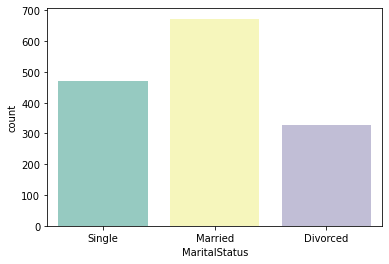

In [25]:
# Plotting MaritalStatus column 
sns.countplot(df['MaritalStatus'],palette='Set3')

- Most of the employees are Married.Divorced is less than number.

In [26]:
#Counting Job Role column
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

- The highest number of  employees work in "Sales Executive" job Role.
- The lowest number of  employees work in "Human Resources" job Role.

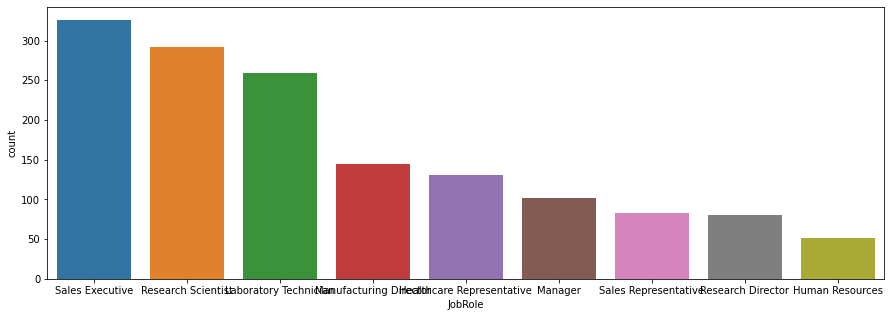

In [27]:
# Plotting JobRole column 
plt.figure(figsize=(15,5))
sns.countplot('JobRole',data=df)
plt.show()

- The highest number of  employees work in "Sales Executive" job Role.
- The lowest number of  employees work in "Human Resources" job Role.

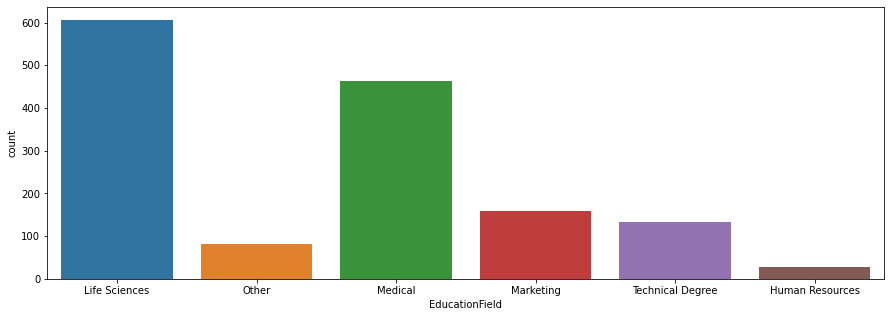

In [28]:
# Plotting Education Field column 
plt.figure(figsize=(15,5))
sns.countplot('EducationField',data=df)
plt.show()

- The education field background of most of the employees is Life Sciences.
- The lowest no of employees are from Human Resources education field background.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

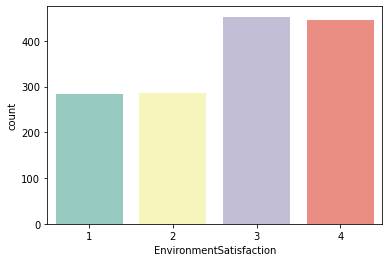

In [29]:
#Plotting EnvironmentSatisfaction:
sns.countplot(df['EnvironmentSatisfaction'],palette='Set3')

- The Environment Satisfaction score having 3 is highest.

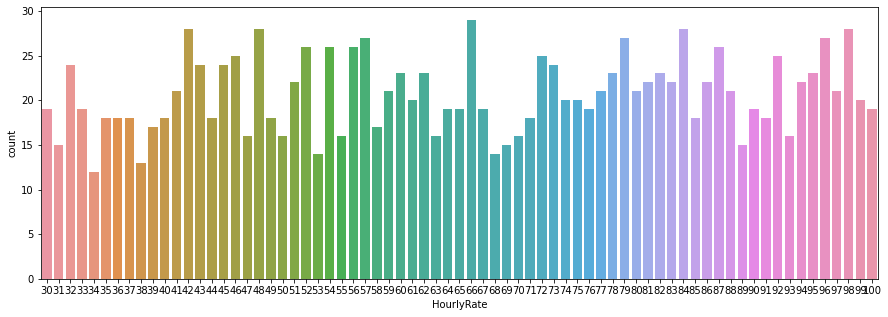

In [30]:
# Plotting the hourly rate:
plt.figure(figsize=(15,5))
sns.countplot('HourlyRate',data=df)
plt.show()

- The highest hourlyy rate is 67 and the lowest hourly rate is 33.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

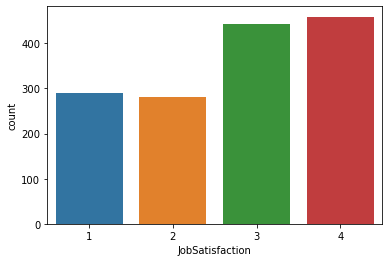

In [31]:
# Plotting Job Satisfaction
sns.countplot('JobSatisfaction', data=df)

- The Job Satisfaction score having 4 is highest.

# BIVARIATE ANALYSIS:

<AxesSubplot:xlabel='Attrition', ylabel='count'>

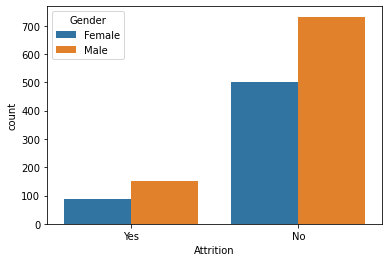

In [32]:
#Plotting Attrition vs Gender
sns.countplot('Attrition', hue='Gender', data=df)

- We can see that, in Attrition(yes),male employess are higher than female employees.
- We can see that, in Attrition(no),male employess are higher than female employees.

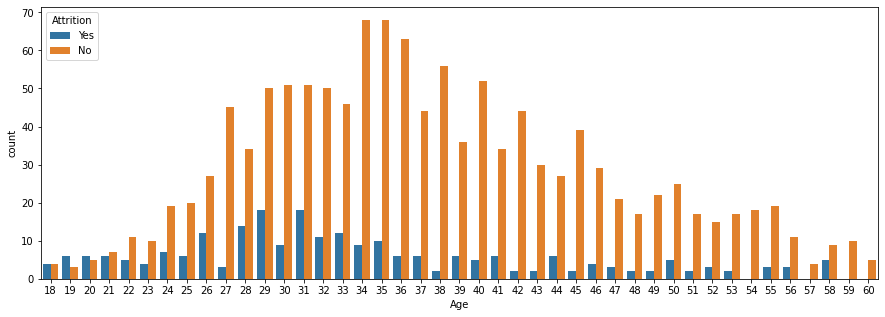

In [33]:
# Plotting Age vs Attrition
plt.figure(figsize=(15,5))
sns.countplot('Age', hue='Attrition', data=df)
plt.show()

- Attrition class  yes is highest in the age group 30.
- Attrition class  yes is lowest in the age group 59 and 60,allmost nill.
- Attrition class  no is highest in the age group 34.
- Attrition class  no is lowest in the age group 19.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

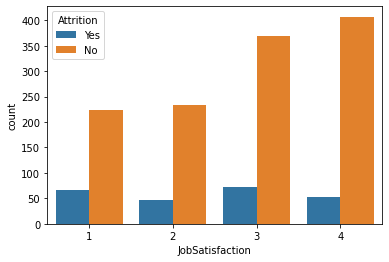

In [34]:
#Plotting Job Satisfaction vs Attrition:
sns.countplot('JobSatisfaction', hue='Attrition', data=df)

- The attrition class no is higher in job satisfaction score 4.that means higher the jobsatisfaction less no of people leave the company and vice versa.

<AxesSubplot:xlabel='Department', ylabel='count'>

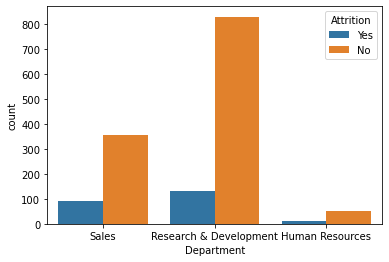

In [35]:
#Plotting Department vs Attrition:
sns.countplot('Department', hue='Attrition', data=df)

- The  highest no of Attrition class Yes is in Research and development Department.
- The  lowest no of Attrition class Yes is in HUman Resources Department.
- The  highest no of Attrition class no is in Research and development Department.
- The  lowest no of Attrition class no is in Human Resource department.

- by this plot we can conclude that Research and development department is a stable department because the no of NO attrition is huge compared to Attrition Yes.
- Sales department is a unstable department because the no of Yes attrition is huge compared to Attrition No class.

<AxesSubplot:xlabel='Age', ylabel='MonthlyIncome'>

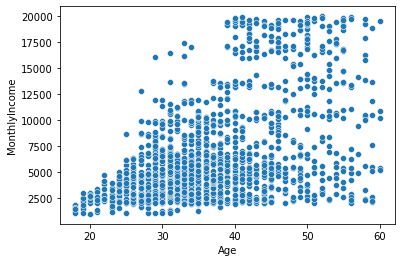

In [36]:
# Monthly income vs Age
sns.scatterplot(x='Age', y='MonthlyIncome', data=df)

- we can see that Monthlyincome increases when Age is increasing.The employees getting experienced in Age with percentage hike  in salary.

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>

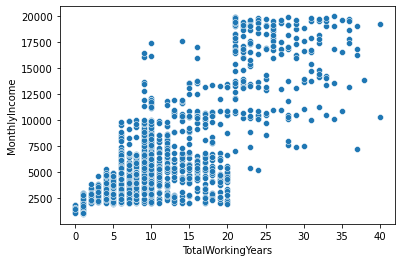

In [37]:
# Monthly income vs Total Working Years:
sns.scatterplot(x='TotalWorkingYears', y='MonthlyIncome', data=df)

- We can see that Monthly income increases with the increase of Total working years.that means the more the no .of working higher will be the monthly income.

<AxesSubplot:xlabel='count', ylabel='EducationField'>

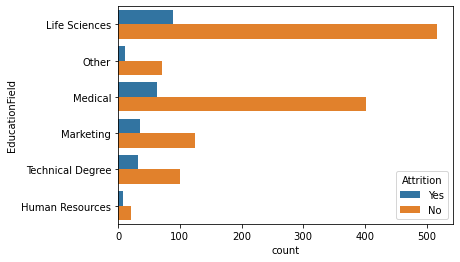

In [38]:
# Educational field Vs Attrition
sns.countplot(y='EducationField', hue='Attrition', data=df)

- The attrition level  is higher in Life sciences educational field because most of the employees are from Life Sciences education Background.

In [39]:
pd.crosstab(df['Attrition'], df['EducationField'])

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


- Found out the exact YES and NO class of Attrition of each Education Field.

In [40]:
pd.crosstab(df['Attrition'], df['JobSatisfaction'])

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


- The jobSatisfaction score of 4 have highest number of Attrition class no,that means higher the jobsatisfaction lesser to leave the company. 

<AxesSubplot:xlabel='OverTime', ylabel='count'>

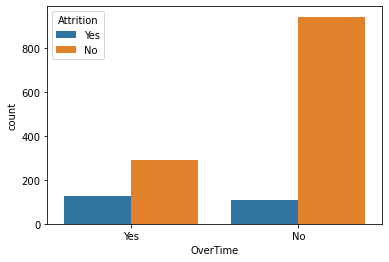

In [41]:
# Attrition vs Overtime
sns.countplot(data=df,x='OverTime',hue='Attrition')

- There are 30% chance of an employee doing an overtime, that he/she will leave the company.

<AxesSubplot:xlabel='Department', ylabel='count'>

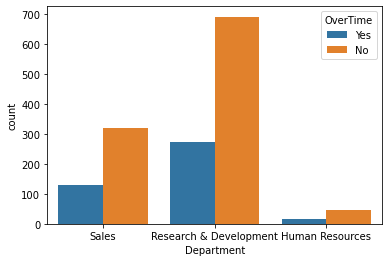

In [42]:
# Overttime vs Department
sns.countplot(data=df,x='Department',hue='OverTime')

- As we can see that overtime is high in R&D hence the attrition is also high.

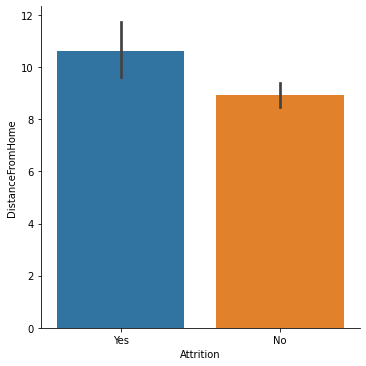

In [43]:
# Distance from home vs Attrition:
sns.factorplot(data=df,kind='bar',x='Attrition',y='DistanceFromHome')

- Percentage wise staff staying far is more likely to leave the company.

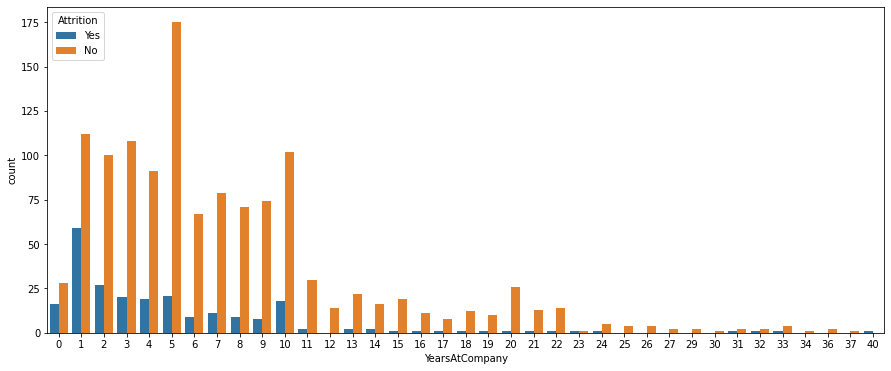

In [44]:
# Attrition vs Yearsatcompany
plt.figure(figsize=(15,6))
sns.countplot(data=df,x='YearsAtCompany',hue='Attrition')
plt.show()

- Attrition is low if the employee has spent more years in the company.

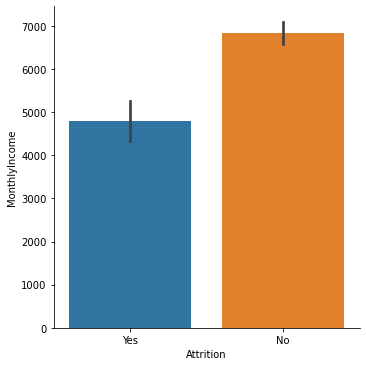

In [45]:
# Attrition vs Monthly income:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

- Employee with mothly income of above 5000 is less like to leave the company.

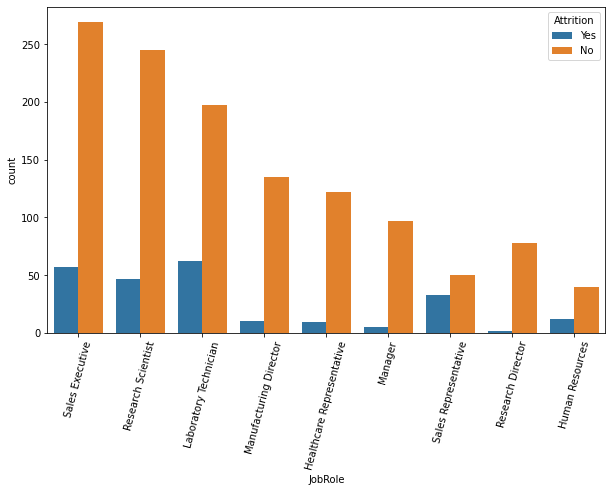

In [46]:
#Plotting job role vs Attrition
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='JobRole',hue='Attrition')
plt.xticks(rotation=75)
plt.show()

- Attrition is low in Senior Management positions

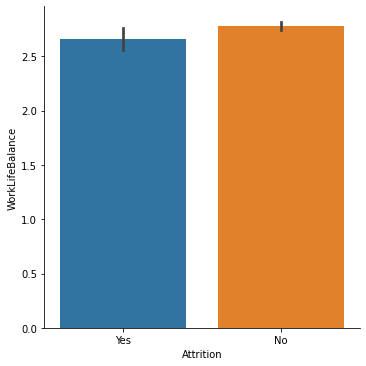

In [47]:
# Plotting Work life BAlance vs Attrition:
sns.factorplot(data=df,kind='bar',x='Attrition',y='WorkLifeBalance')

- The above data shows that Worklife balance has not a deciding facor for an employee to leave the company.

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

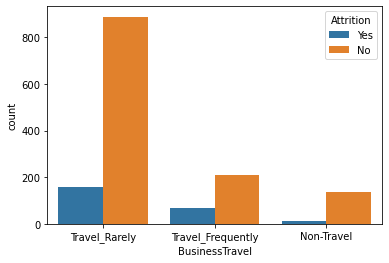

In [48]:
# Plotting BuisnessTravel vs Attrition:
sns.countplot(data=df,x='BusinessTravel',hue='Attrition')

- Employees who are non traveller are less like to leave. Even those who travel frequently it is less likely for them to leave.

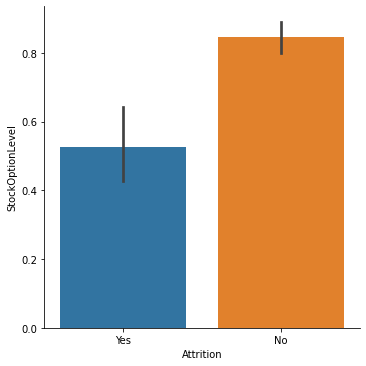

In [49]:
# Attrition vs Stock Option level:
sns.factorplot(data=df,kind='bar',x='Attrition',y='StockOptionLevel')

- Higher the stock option level, less is the attrition.

- Key takeaway from above visualization:

- There is class imbalance in our target variable.
- Most of the employees are Male.
- Most of the employees are married.
- Attrition is high among Single employees.
- Employee is less likely to resign if they spent more years in the company.
- High paid employee is also more likele to stay

In [50]:
# Label encoding the Attrition class:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['Attrition'] = LE.fit_transform(df['Attrition'])

In [51]:
df['Attrition'].unique()

array([1, 0])

- Label Encoded the Attrition class as 0 and 1. Yes=1 and NO=0.

In [52]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

- Label Encoded the Attrition class as 0 and 1. Yes=1 and NO=0.we have seen earlier that no class are higher than Yes class.

In [53]:
# Watching the Attrition column after Label Encoding.
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# MULTIVARIATE ANALYSIS:

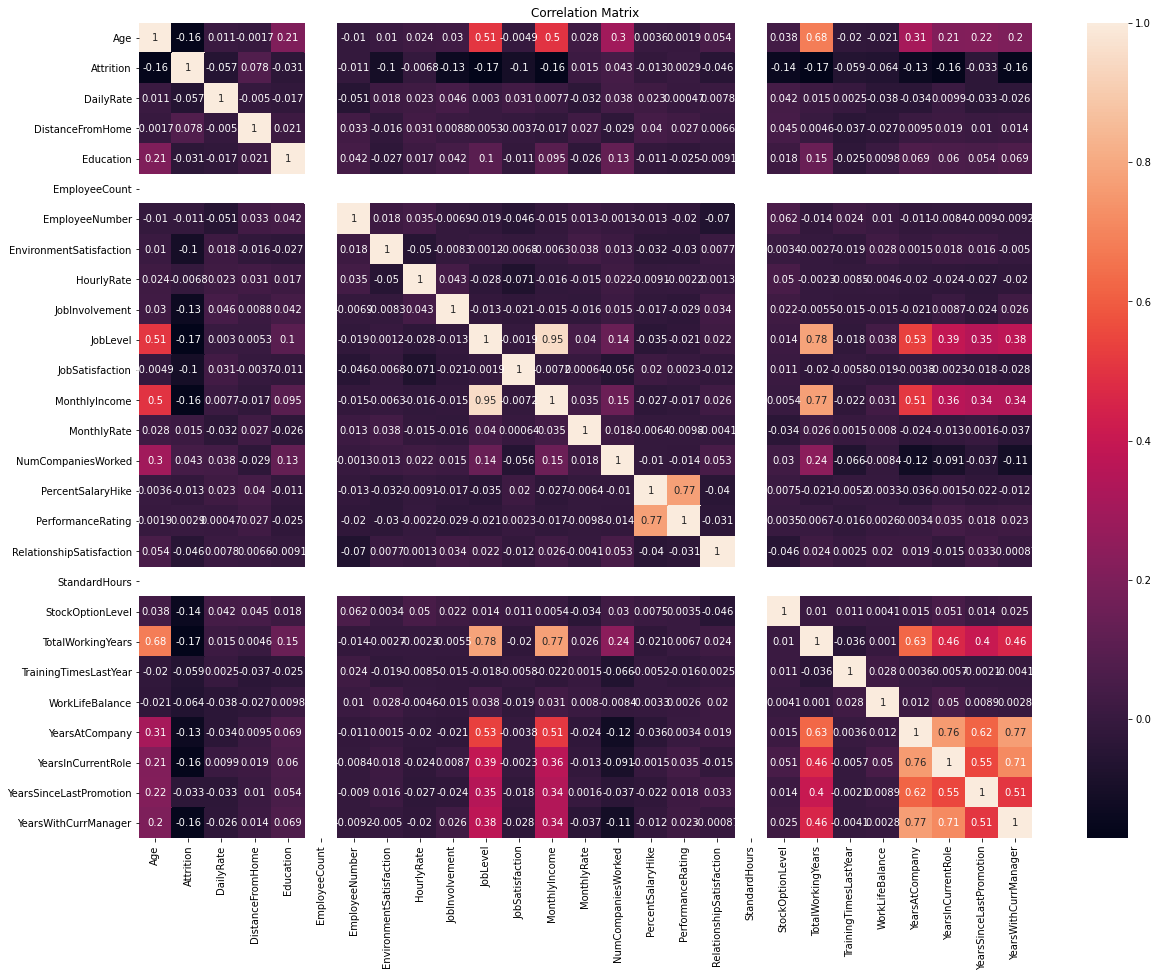

In [54]:
# CHECKING MULTI-COLINEARITY OF THE COLUMNS:
corr_mat = df.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat, annot=True)
plt.title('Correlation Matrix')
plt.show()

- Performance rating and PercenrSalaryHike is highly corelated.

- Monthly income is highly corelated with Job level. Its obvious as management get higher salary.

- Years in company is highly corelated with years in current role. That means employess has found comfort in their current role and do not want to leave the company.

- standard hours and employee count is not co-related to each other.


# Checking Normal distribution:

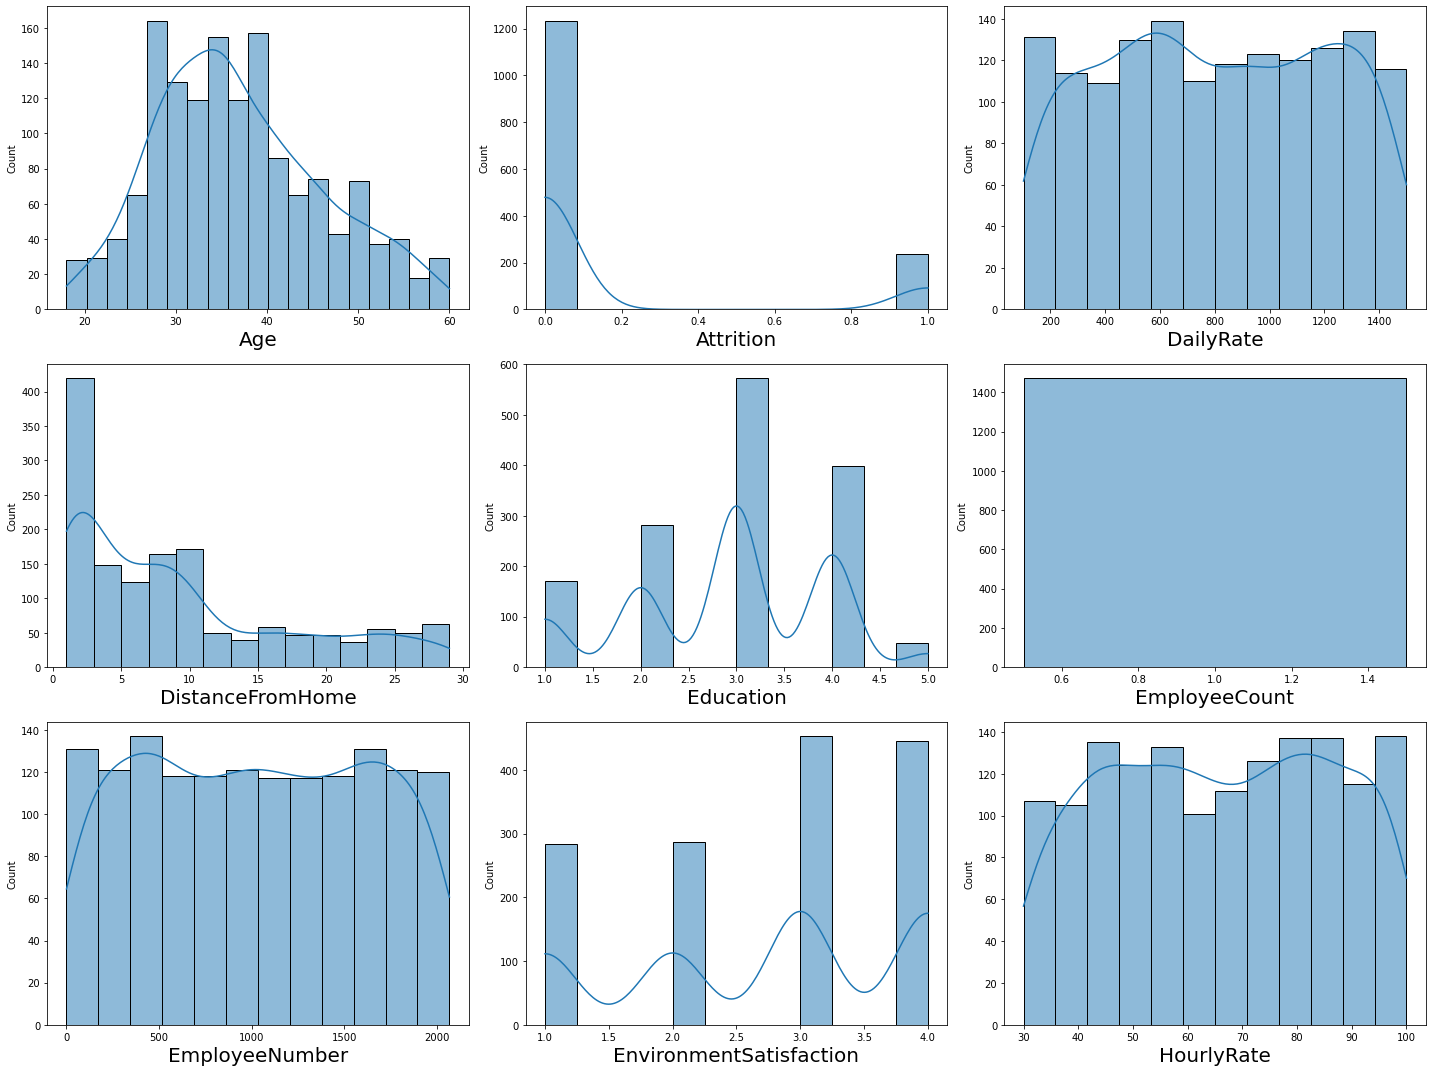

In [55]:
#Separating the continuous features and checking normal distribution with histplot:
df_features = df[['Age', 'Attrition','DailyRate',
       'DistanceFromHome', 'Education','EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction','HourlyRate']]
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df_features[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Only Age column is showing bell curved shape,showing normal distribution.
- Other columns are not perfectly in normal distribution.we have to put it in shape by reducing the skewness and removing the outliers.

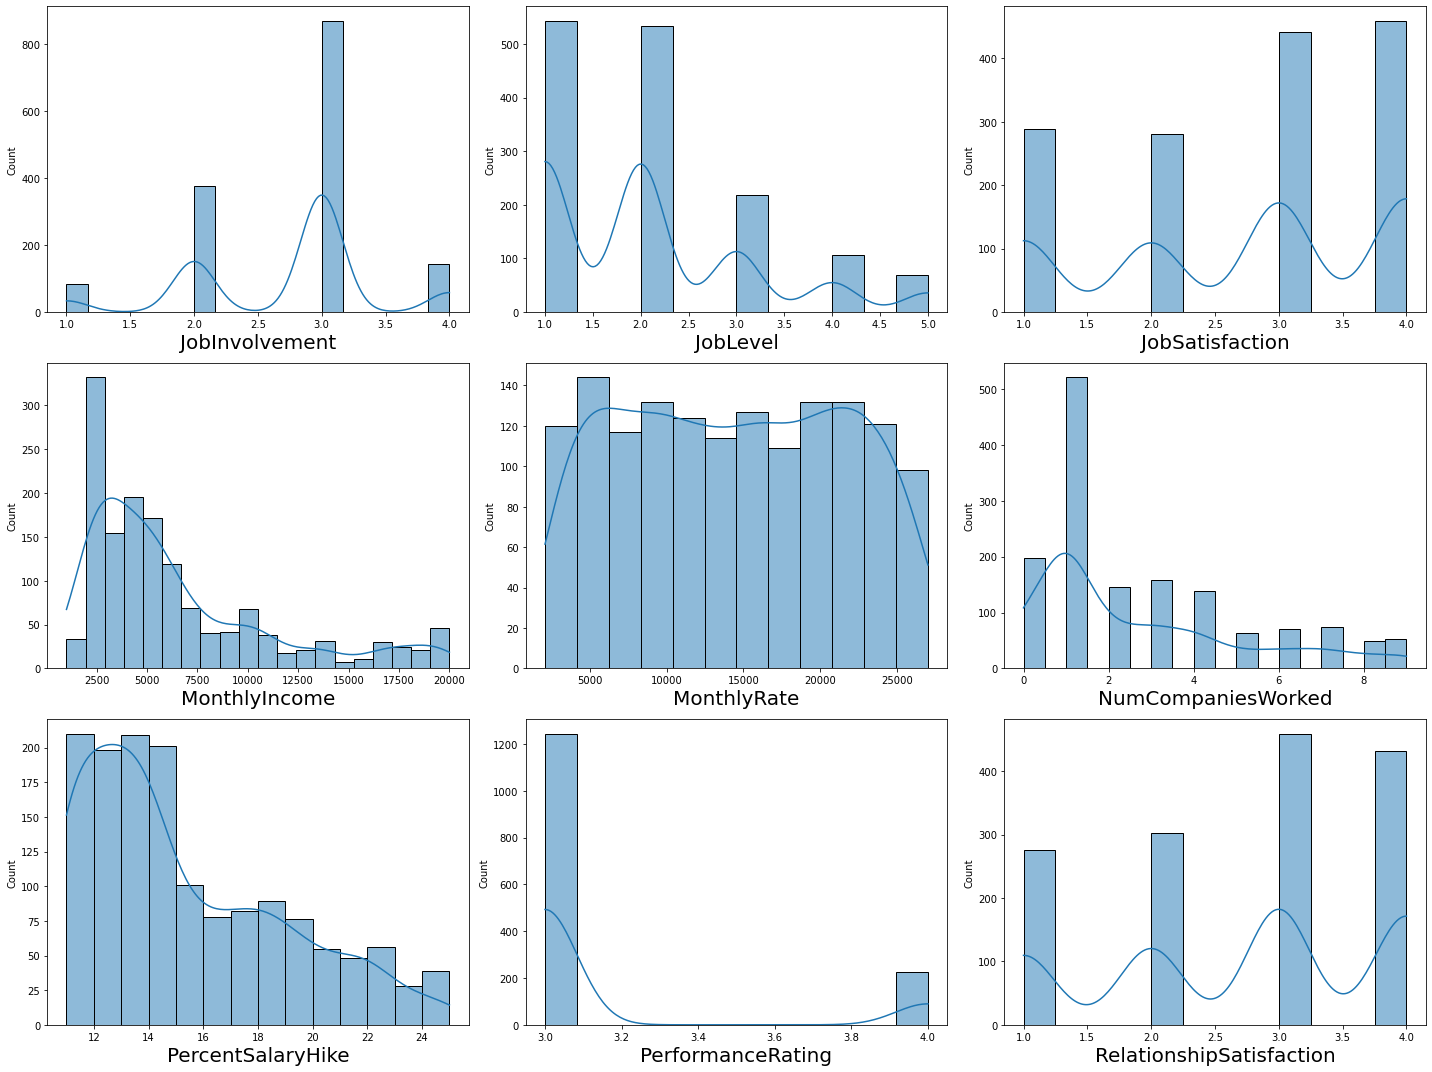

In [56]:
#Separating the continuous features and checking normal distribution with histplot:
df_features1 = df[['JobInvolvement', 'JobLevel','JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction']]
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features1:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df_features1[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- No columns are not perfectly in normal distribution.we have to put it in shape by reducing the skewness and removing the outliers.

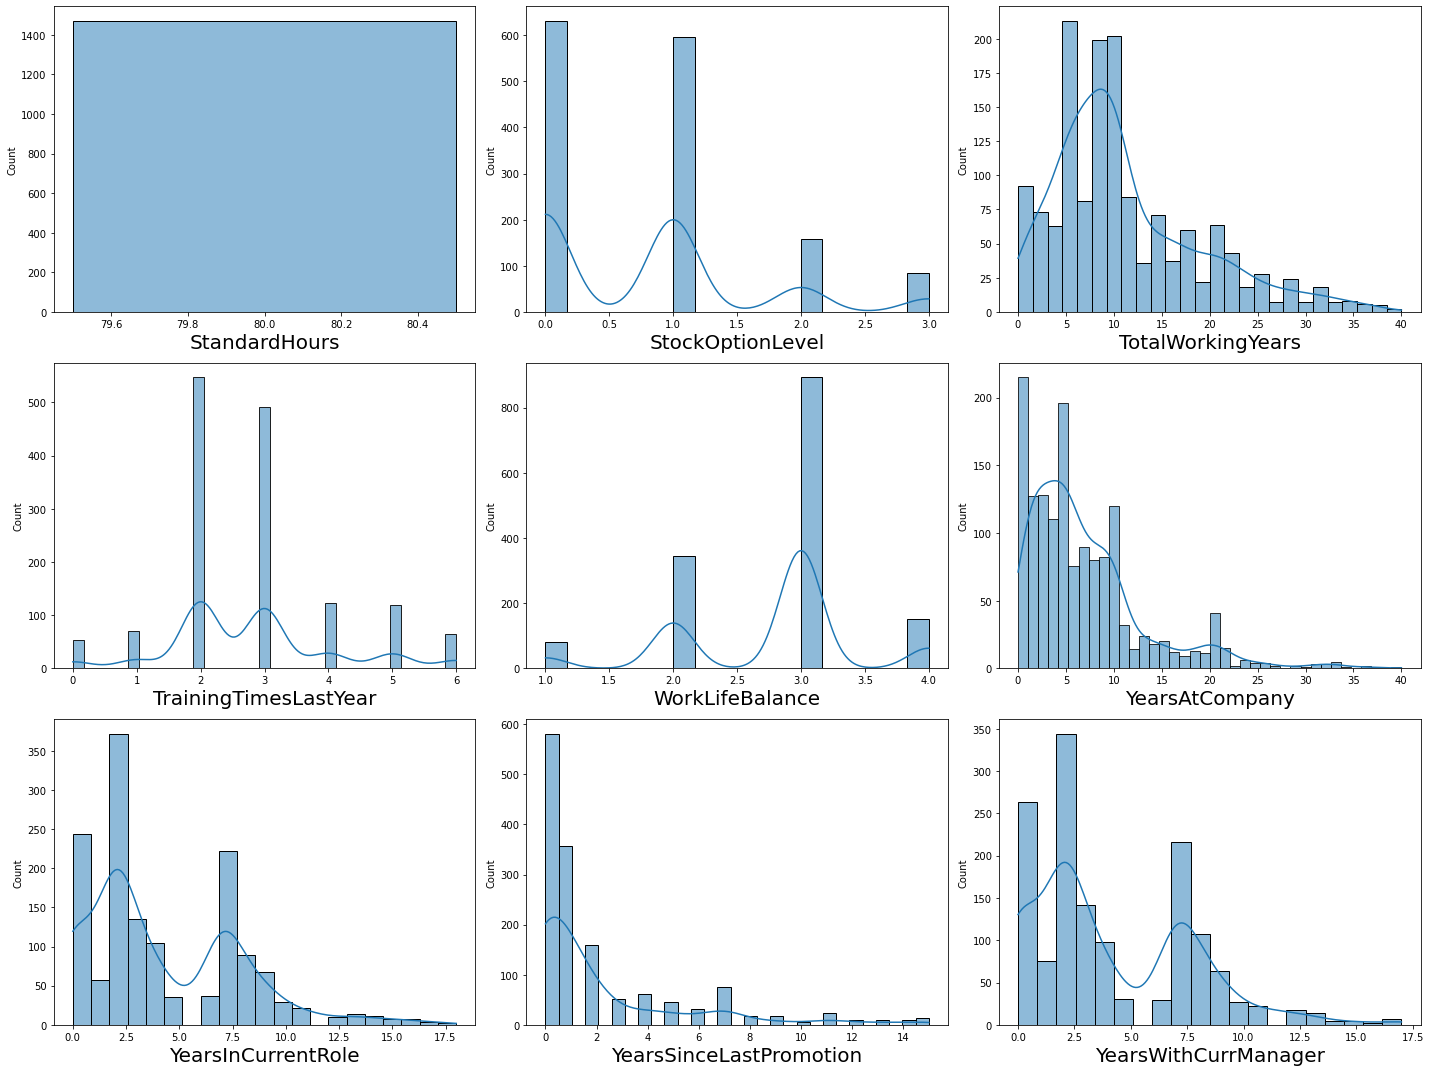

In [57]:
#Separating the continuous features and checking normal distribution with histplot:
df_features2 = df[['StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']]
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for column in df_features2:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.histplot(df_features2[column],kde=True)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Other columns are not perfectly in normal distribution.we have to put it in shape by reducing the skewness and removing the outliers.

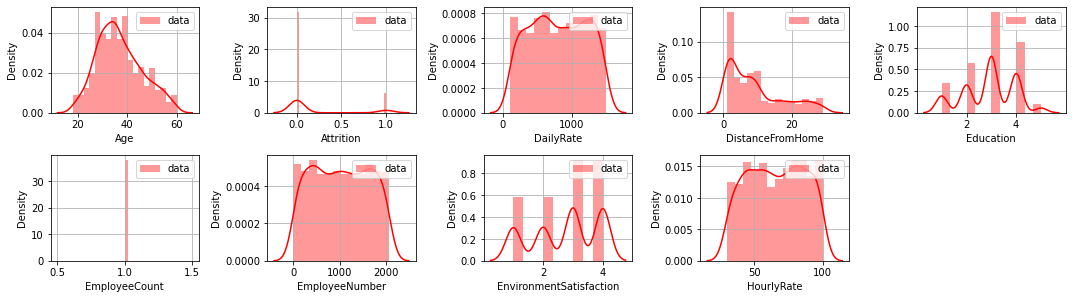

In [58]:
# Checking normal distribution:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(df_features.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df_features[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- By this plot we can clearly depict that only the Age column is showing normal distribution.
- Daily Rate,Employee Number and Hourly rate is close to normaly distributon.
- Distance from home is having Right skewness.

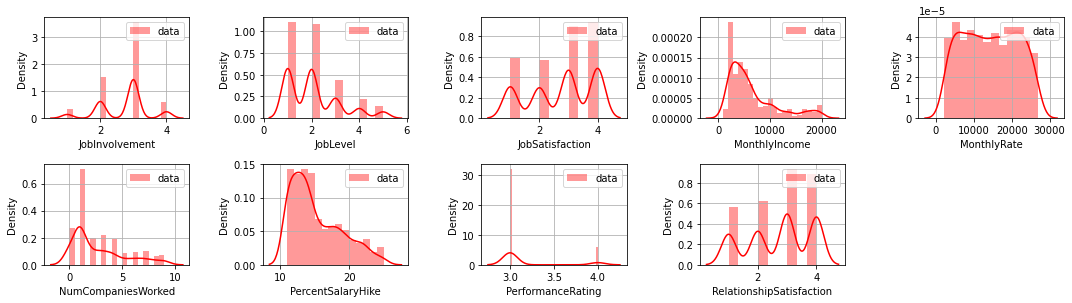

In [59]:
# Checking normal distribution:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(df_features1.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df_features1[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- Percent Salary hike and Monthly Income ishaving Right skewness.
- Monthly rate is close to normally distribution.
- others are not at all in shape of normal distribution.

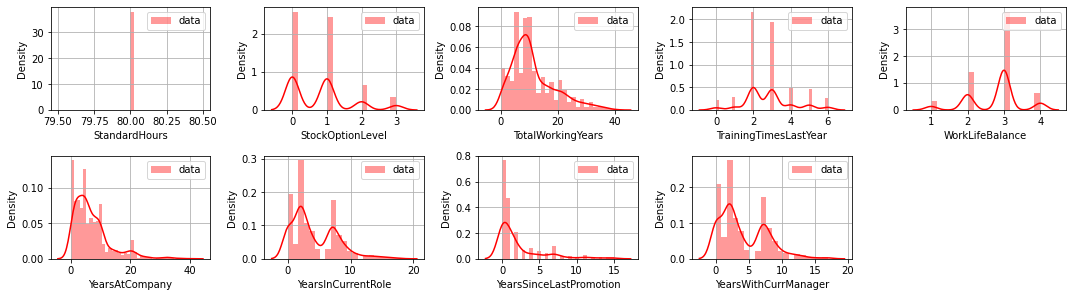

In [60]:
# Checking normal distribution:
plt.figure(figsize=(15,10))
for i,col in enumerate(list(df_features2.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df_features2[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

- Totalworkingyears,Yearsatcompany,yearsincurrentrole,Yearssincelastpromotion and YearswithCurrManager is having huge rightskewness.
- Other columns are not at all showing the shape of normal distribution.

# Checking outliers:

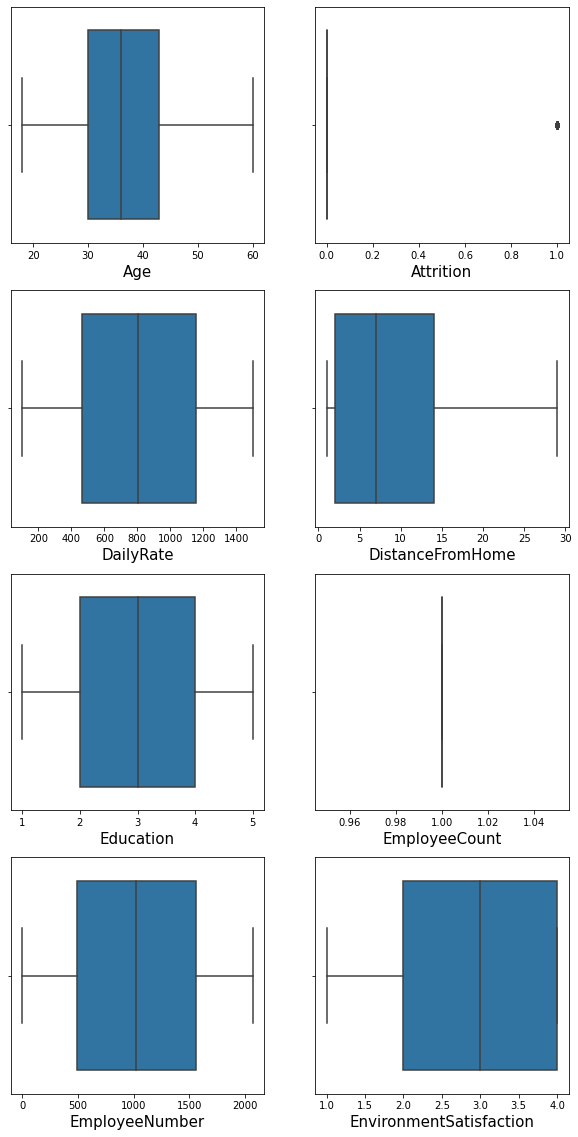

In [61]:
# Checking the outliers by using boxplot
plt.figure(figsize=(10,20))
graph=1
for column in df_features:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df_features[column],)
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

- Having outliers in Attrition Column.

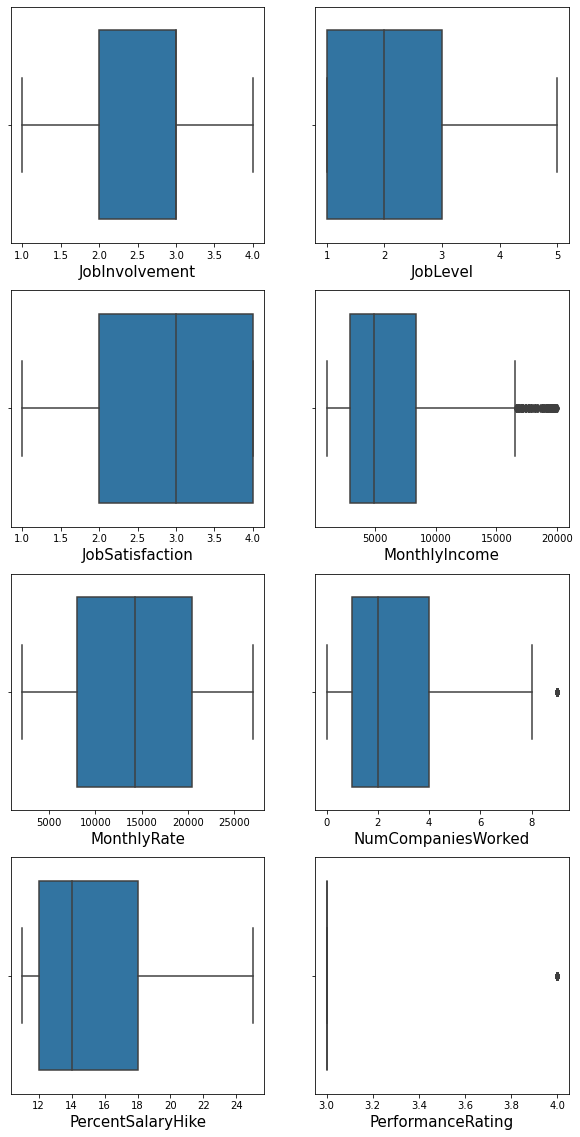

In [62]:
# Checking the outliers by using boxplot
plt.figure(figsize=(10,20))
graph=1
for column in df_features1:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df_features1[column],)
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

- Having Outliers in NumCompanies worked and Performance Rating.we will remove it by Z-score latter.

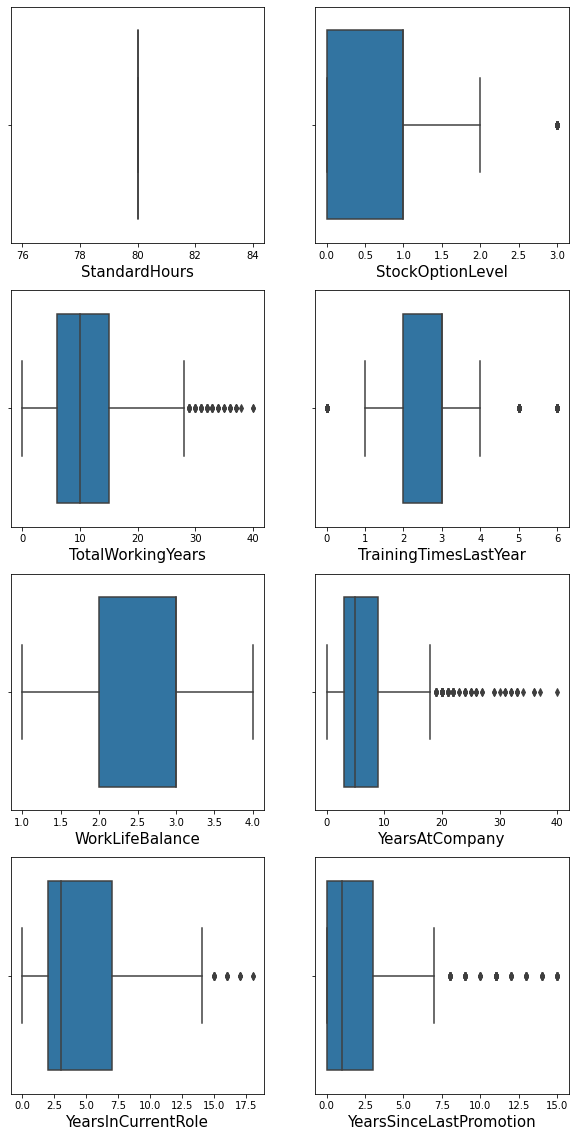

In [63]:
# Checking the outliers by using boxplot
plt.figure(figsize=(10,20))
graph=1
for column in df_features2:
    if graph<=8:
        ax=plt.subplot(4,2,graph)
        sns.boxplot(df_features2[column],)
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

- Having outliers in Stock option level,Training times last year,years at company,yearsincurrentRole and YearsSincelast Promotion.we will remove the outliers by using z-score ;atter.

In [64]:
#Removing outliers by using Z-score: 
z_score = zscore(df[[
'Attrition','YearsAtCompany','StockOptionLevel','TrainingTimesLastYear']])
abs_z_score=np.abs(z_score)

filtering_entry=(abs_z_score<3).all(axis=1)

df=df[filtering_entry]
df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.0,1445.000000,1445.000000,1445.000000,1445.000000,...,1445.000000,1445.0,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,36.663668,0.161246,804.921107,9.202768,2.903806,1.0,1027.330796,2.721799,65.936332,2.733564,...,2.709343,80.0,0.796540,10.910727,2.795848,2.762630,6.587543,4.147405,2.085813,4.041522
std,8.982306,0.367885,403.685471,8.096098,1.019759,0.0,603.416250,1.092078,20.292121,0.711219,...,1.081167,0.0,0.856854,7.304397,1.291024,0.705922,5.247884,3.562618,3.057546,3.513873
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,467.000000,2.000000,2.000000,1.0,491.000000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,35.000000,0.000000,805.000000,7.000000,3.000000,1.0,1025.000000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,42.000000,0.000000,1162.000000,14.000000,4.000000,1.0,1558.000000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,37.000000,6.000000,4.000000,25.000000,18.000000,15.000000,17.000000


In [65]:
df.shape

(1445, 35)

- We didnot loose any data as such,so the outliers will be there still.

In [66]:
df[['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours']].describe(include='all')

,Over18,EmployeeCount,EmployeeNumber,StandardHours
count,1445,1445.0,1445.000000,1445.0
unique,1,NaN,NaN,NaN
top,Y,NaN,NaN,NaN
freq,1445,NaN,NaN,NaN
mean,NaN,1.0,1027.330796,80.0
std,NaN,0.0,603.416250,0.0
min,NaN,1.0,1.000000,80.0
25%,NaN,1.0,491.000000,80.0
50%,NaN,1.0,1025.000000,80.0
75%,NaN,1.0,1558.000000,80.0


- This above columns doesnt have any important data,all the datas are quite same ,we will drop this column for achiving better accuracy.

In [67]:
# Dropping the unwanted columns:
df.drop(['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'], axis=1, inplace=True)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [68]:
# Showing the Categorical columns of the dataset:
df[['MaritalStatus', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime']]

,MaritalStatus,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime
0,Single,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Yes
1,Married,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,No
2,Single,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Yes
3,Married,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Yes
4,Married,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,No
...,...,...,...,...,...,...,...
1465,Married,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,No
1466,Married,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,No
1467,Married,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Yes
1468,Married,Travel_Frequently,Sales,Medical,Male,Sales Executive,No


- This columns are categorical in nature so we need to conver the values into numerical before entering it into the model.

In [69]:
#Encoding the categorical columns into numerical:
LE = LabelEncoder()
df['MaritalStatus'] = LE.fit_transform(df['MaritalStatus'])
df['BusinessTravel'] = LE.fit_transform(df['BusinessTravel'])
df['Department'] = LE.fit_transform(df['Department'])
df['EducationField'] = LE.fit_transform(df['EducationField'])
df['Gender'] = LE.fit_transform(df['Gender'])
df['JobRole'] = LE.fit_transform(df['JobRole'])
df['OverTime'] = LE.fit_transform(df['OverTime'])

In [70]:
df[['MaritalStatus', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'OverTime']]

,MaritalStatus,BusinessTravel,Department,EducationField,Gender,JobRole,OverTime
0,2,2,2,1,0,7,1
1,1,1,1,1,1,6,0
2,2,2,1,4,1,2,1
3,1,1,1,1,0,6,1
4,1,2,1,3,1,2,0
...,...,...,...,...,...,...,...
1465,1,1,1,3,1,2,0
1466,1,2,1,3,1,0,0
1467,1,2,1,1,1,4,1
1468,1,1,2,3,1,7,0


- All the columns are converted to numerical from categorical.

In [73]:
# Multicolinearity Detection:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.167371,0.025426,0.024249,-0.031792,-0.000500,0.200219,-0.041048,0.009304,-0.042464,...,0.005547,0.048045,0.044730,0.660774,-0.024319,-0.018279,0.236112,0.183659,0.177738,0.172483
Attrition,-0.167371,1.000000,-0.004455,-0.051372,0.065080,0.080625,-0.032465,0.024148,-0.107180,0.036557,...,0.005429,-0.050974,-0.139710,-0.189471,-0.060413,-0.065847,-0.163174,-0.171380,-0.036937,-0.159469
BusinessTravel,0.025426,-0.004455,1.000000,-0.003993,-0.010024,-0.025988,0.000468,0.022535,-0.000705,-0.026728,...,-0.027370,-0.030634,-0.016240,0.037267,0.013912,-0.005295,-0.015650,-0.016493,-0.016466,-0.026513
DailyRate,0.024249,-0.051372,-0.003993,1.000000,0.009477,-0.007574,-0.018749,0.040290,0.023584,-0.013465,...,-0.001701,0.013215,0.040664,0.036437,0.005801,-0.043918,-0.009095,0.021277,-0.025759,-0.023173
Department,-0.031792,0.065080,-0.010024,0.009477,1.000000,0.018278,0.006788,0.017086,-0.023016,-0.042037,...,-0.033400,-0.018754,-0.008125,-0.015001,0.035608,0.026984,0.030438,0.059204,0.047579,0.029314
DistanceFromHome,-0.000500,0.080625,-0.025988,-0.007574,0.018278,1.000000,0.013856,0.001937,-0.018601,-0.004430,...,0.024801,0.004206,0.042488,0.007977,-0.036121,-0.027076,0.014928,0.024197,0.007438,0.016354
Education,0.200219,-0.032465,0.000468,-0.018749,0.006788,0.013856,1.000000,-0.037908,-0.031509,-0.026026,...,-0.025460,-0.007161,0.022761,0.132261,-0.028077,0.006739,0.036190,0.055373,0.042406,0.049431
EducationField,-0.041048,0.024148,0.022535,0.040290,0.017086,0.001937,-0.037908,1.000000,0.043672,0.004337,...,-0.003451,-0.006556,-0.018150,-0.028424,0.053596,0.042811,-0.020271,-0.008731,0.009880,0.001491
EnvironmentSatisfaction,0.009304,-0.107180,-0.000705,0.023584,-0.023016,-0.018601,-0.031509,0.043672,1.000000,-0.004341,...,-0.033272,0.012995,0.005335,-0.005894,-0.021646,0.030162,-0.002031,0.015709,0.025406,-0.004387
Gender,-0.042464,0.036557,-0.026728,-0.013465,-0.042037,-0.004430,-0.026026,0.004337,-0.004341,1.000000,...,-0.013644,0.025366,0.014823,-0.060862,-0.038735,-0.009353,-0.051731,-0.043410,-0.034287,-0.040561


- Performance rating and PercenrSalaryHike is highly corelated.

- Monthly income is highly corelated with Job level. Its obvious as management get higher salary.

- Years in company is highly corelated with years in current role. That means employess has found comfort in their current role and do not want to leave the company.

- standard hours and employee count is not co-related to each other.

# Dividing the dataset into features and label:

In [75]:
x = df.drop(columns=['Attrition'], axis=1)
y = df['Attrition']
x

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,2,0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,3,1,61,...,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,1,92,...,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,4,0,56,...,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,1,1,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,884,1,23,2,3,3,1,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,2,613,1,6,1,3,4,1,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,2,155,1,4,3,1,2,1,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,1,1023,2,2,3,3,4,1,63,...,3,4,0,17,3,2,9,6,0,8


In [76]:
# counting the Attrition class for balancing it with smote:
y.value_counts()

0    1212
1     233
Name: Attrition, dtype: int64

In [77]:
# Balancing both the classes with SMOTE:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y = sm.fit_resample(x,y)

In [377]:
y.value_counts()

1    1212
0    1212
Name: Attrition, dtype: int64

-Now both the classes is equal and balanced.we have done it by using  SMOTE oversampling.

In [80]:
#checking skewness:
x.skew()

Age                         0.518439
BusinessTravel             -1.006722
DailyRate                   0.016186
Department                  0.193480
DistanceFromHome            0.824646
Education                  -0.139162
EducationField              0.619401
EnvironmentSatisfaction    -0.024198
Gender                     -0.046246
HourlyRate                  0.035366
JobInvolvement             -0.350162
JobLevel                    1.307383
JobRole                    -0.330216
JobSatisfaction            -0.029162
MaritalStatus              -0.121030
MonthlyIncome               1.648450
MonthlyRate                 0.026055
NumCompaniesWorked          0.992069
OverTime                    0.934939
PercentSalaryHike           0.841472
PerformanceRating           2.532975
RelationshipSatisfaction   -0.095629
StockOptionLevel            1.363252
TotalWorkingYears           1.210021
TrainingTimesLastYear       0.560549
WorkLifeBalance            -0.339595
YearsAtCompany              1.494211
Y

- We can ser that YearsWithCurrManager,YearsSinceLastPromotion,YearsInCurrentRole,YearsAtCompany,PerformanceRating,PercentSalaryHike,OverTime,NumCompaniesWorked,MonthlyIncome and Joblevel column is highly skewed ,we will use log transgormation to remove the skewness.

In [81]:
#Treating the skewness using log
import numpy as np
for col in x.columns:
#Here complete column name has been passed
    if x.skew().loc[col]>0.55:
        x[col]=np.log1p(x[col])

In [82]:
#checking skewness after using log transformation:
x.skew()

Age                         0.518439
BusinessTravel             -1.006722
DailyRate                   0.016186
Department                  0.193480
DistanceFromHome           -0.224521
Education                  -0.139162
EducationField             -0.099104
EnvironmentSatisfaction    -0.024198
Gender                     -0.046246
HourlyRate                  0.035366
JobInvolvement             -0.350162
JobLevel                    0.753528
JobRole                    -0.330216
JobSatisfaction            -0.029162
MaritalStatus              -0.121030
MonthlyIncome               0.459404
MonthlyRate                 0.026055
NumCompaniesWorked          0.010165
OverTime                    0.934939
PercentSalaryHike           0.522071
PerformanceRating           2.532975
RelationshipSatisfaction   -0.095629
StockOptionLevel            0.770334
TotalWorkingYears          -0.522025
TrainingTimesLastYear      -1.095647
WorkLifeBalance            -0.339595
YearsAtCompany             -0.132556
Y

- We can see that the skewness is reduced after using Log transformation.But there is still skewness in the dataset.we cannot loose more data and the skewness present in the dataset is negligible now.

# Standardization:-

In [83]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# VIF:

In [382]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,2.005904,Age
1,1.035920,BusinessTravel
2,1.036942,DailyRate
3,2.014537,Department
4,1.036831,DistanceFromHome
5,1.080314,Education
6,1.057925,EducationField
7,1.081047,EnvironmentSatisfaction
8,1.060594,Gender
9,1.029873,HourlyRate


- As we know that the VIF score of 1 means that the predictor is not correlated with other variables.here most of the column's score is nearest to 1 that means the predictor is not correlated with this variables.joblevel ,Monthly income,Years at company,years in current role and yearswit curr manager is highly co-related.

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25, random_state=41)

# CREATING MODELS:

# 1. LINEAR REGRESSION:

In [384]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,lr_pred)}\n")

Accuracy score:84.82%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.846659    0.849724  0.848185     0.848192      0.848192
recall       0.850385    0.845985  0.848185     0.848185      0.848185
f1-score     0.848518    0.847850  0.848185     0.848184      0.848184
support    909.000000  909.000000  0.848185  1818.000000   1818.000000
 Confusion Matrix:
[[773 136]
 [140 769]]



In [385]:
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,lr_pred)}\n")

Accuracy score:85.15%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.851485    0.851485  0.851485    0.851485      0.851485
recall       0.851485    0.851485  0.851485    0.851485      0.851485
f1-score     0.851485    0.851485  0.851485    0.851485      0.851485
support    303.000000  303.000000  0.851485  606.000000    606.000000
 Confusion Matrix:
[[258  45]
 [ 45 258]]



In [386]:
roc_auc_score(y_test,lr.predict(x_test))

0.8514851485148514

# 2.Decission Tree Classifier:

In [387]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_pred = dt.predict(x_train)
dt_clf_report = pd.DataFrame(classification_report(y_train,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,dt_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,dt_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    909.0  909.0       1.0     1818.0        1818.0
 Confusion Matrix:
[[909   0]
 [  0 909]]



In [388]:
dt_pred=dt.predict(x_test)
dt_clf_report = pd.DataFrame(classification_report(y_test,dt_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,dt_pred)*100:.2f}%")

print(f"CLASSIFICATION REPORT:\n{dt_clf_report}")

print(f" Confusion Matrix:\n{confusion_matrix(y_test,dt_pred)}\n")

Accuracy score:81.85%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.840989    0.798762  0.818482    0.819876      0.819876
recall       0.785479    0.851485  0.818482    0.818482      0.818482
f1-score     0.812287    0.824281  0.818482    0.818284      0.818284
support    303.000000  303.000000  0.818482  606.000000    606.000000
 Confusion Matrix:
[[238  65]
 [ 45 258]]



In [389]:
roc_auc_score(y_test,dt.predict(x_test))

0.8184818481848184

# 3. Random Forrest Classifier:

In [390]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_train)
rf_clf_report = pd.DataFrame(classification_report(y_train,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,rf_pred)}\n")

Accuracy score:100.00%
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    909.0  909.0       1.0     1818.0        1818.0
 Confusion Matrix:
[[909   0]
 [  0 909]]



In [391]:
rf_pred=rf.predict(x_test)
rf_clf_report = pd.DataFrame(classification_report(y_test,rf_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,rf_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{rf_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,rf_pred)}\n")


Accuracy score:92.57%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.916129    0.935811  0.925743    0.925970      0.925970
recall       0.937294    0.914191  0.925743    0.925743      0.925743
f1-score     0.926591    0.924875  0.925743    0.925733      0.925733
support    303.000000  303.000000  0.925743  606.000000    606.000000
 Confusion Matrix:
[[284  19]
 [ 26 277]]



In [392]:
roc_auc_score(y_test,rf.predict(x_test))

0.9257425742574258

# 4.K-Neighbors Classifier:

In [393]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,kn_pred)}\n")

Accuracy score:90.10%
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.986649    0.840973   0.90099     0.913811      0.913811
recall       0.812981    0.988999   0.90099     0.900990      0.900990
f1-score     0.891435    0.908999   0.90099     0.900217      0.900217
support    909.000000  909.000000   0.90099  1818.000000   1818.000000
 Confusion Matrix:
[[739 170]
 [ 10 899]]



In [394]:
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{kn_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,kn_pred)}\n")

Accuracy score:85.64%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.977876    0.784211  0.856436    0.881043      0.881043
recall       0.729373    0.983498  0.856436    0.856436      0.856436
f1-score     0.835539    0.872621  0.856436    0.854080      0.854080
support    303.000000  303.000000  0.856436  606.000000    606.000000
 Confusion Matrix:
[[221  82]
 [  5 298]]



In [395]:
roc_auc_score(y_test,kn.predict(x_test))

0.8564356435643565

# 5. Support vector Classifier:

In [396]:
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_train)
svc_clf_report = pd.DataFrame(classification_report(y_train,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_train,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{lr_clf_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_train,svc_pred)}\n")

Accuracy score:95.54%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.851485    0.851485  0.851485    0.851485      0.851485
recall       0.851485    0.851485  0.851485    0.851485      0.851485
f1-score     0.851485    0.851485  0.851485    0.851485      0.851485
support    303.000000  303.000000  0.851485  606.000000    606.000000
 Confusion Matrix:
[[878  31]
 [ 50 859]]



In [397]:
svc_pred=svc.predict(x_test)
svc_report = pd.DataFrame(classification_report(y_test,svc_pred,output_dict=True))
print(f"Accuracy score:{accuracy_score(y_test,svc_pred)*100:.2f}%")
print(f"CLASSIFICATION REPORT:\n{svc_report}")
print(f" Confusion Matrix:\n{confusion_matrix(y_test,svc_pred)}\n")

Accuracy score:90.92%
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.894904    0.924658  0.909241    0.909781      0.909781
recall       0.927393    0.891089  0.909241    0.909241      0.909241
f1-score     0.910859    0.907563  0.909241    0.909211      0.909211
support    303.000000  303.000000  0.909241  606.000000    606.000000
 Confusion Matrix:
[[281  22]
 [ 33 270]]



# CROSS VALIDATION SCORE:

In [398]:
roc_auc_score(y_test,svc.predict(x_test))

0.9092409240924092

In [399]:
print(f" CV Score of LR:{cross_val_score(lr,x,y,cv=5).mean()*100:.2f}%")

 CV Score of LR:76.40%


In [400]:
print(f"CV Score of DT:{cross_val_score(dt,x,y,cv=5).mean()*100:.2f}%")

CV Score of DT:79.71%


In [401]:
print(f"CV Score of RF:{cross_val_score(rf,x,y,cv=5).mean()*100:.2f}%")

CV Score of RF:90.27%


In [402]:
print(f"CV Score of KNN:{cross_val_score(kn,x,y,cv=5).mean()*100:.2f}%")

CV Score of KNN:65.06%


In [403]:
print(f"CV Score of SVC:{cross_val_score(svc,x,y,cv=5).mean()*100:.2f}%")

CV Score of SVC:51.11%


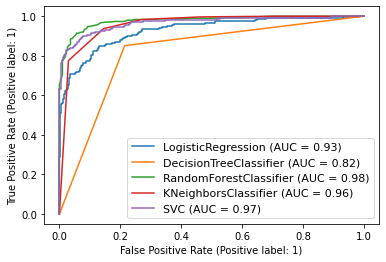

In [404]:
# Let's check ROC_AUC curve for fitted models:

disp =plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

- Choosing random forrest classifier as the best model beacuse we got the least differnce between the Accuracy score and Cross validation score in Random forrest classifier model.we too got highest AUC score in AUC which is 98%.

# Hyper Parameter Tuning of Random forest Classifier model:

In [405]:
grid_param={
   'n_estimators':[13,15,15,17,19,21],
       'criterion':['entropy','gini'],
       'max_depth':[10,15,20,25,30,35],
       'min_samples_split':[10,11,12,13,14,15],
       'min_samples_leaf':[5,6,7,8,9,10]}

In [406]:
grid_search=GridSearchCV(estimator=rf,param_grid=grid_param,cv=5,n_jobs=-1)

In [407]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [10, 15, 20, 25, 30, 35],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10],
                         'min_samples_split': [10, 11, 12, 13, 14, 15],
                         'n_estimators': [13, 15, 15, 17, 19, 21]})

In [408]:
best_parameters=grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 21}


In [410]:
rf = RandomForestClassifier(criterion= 'gini',max_depth=20,min_samples_leaf = 5, min_samples_split=10,n_estimators =21)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.8927392739273927

After doing hyperparameter of Random Forrest model,we got the score of 89.2%.

In [274]:
# model prediction using DT
x_predict = list(dt.predict(x_test))
rf_hr = {'predicted_values':x_predict,'orignal_values':y_test}
print(pd.DataFrame(rf_hr))

      predicted_values  orignal_values
1366                 1               0
203                  0               0
999                  1               0
1654                 1               1
1213                 1               0
...                ...             ...
1449                 1               1
2325                 1               1
296                  0               0
2290                 1               1
74                   0               0

[606 rows x 2 columns]


In [275]:
#import joblib
import joblib

joblib.dump(dt,'rf_hr_file.obj')

# SAVING THE MODEL

['rf_hr_file.obj']

In [277]:
rf_hr_joblib=joblib.load('rf_hr_file.obj')
rf_hr_joblib.predict(x_test)

#TESTING THE SAVED MODEL

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,

# Conclusion: 

We have successfully learned how to analyze employee attrition using “Random Forrest classifier” with the help of machine learning techniques. Only with a couple of codes and a proper data set, a company can easily understand which areas needed to look after to make the workplace more comfortable for their employees and restore their human resource power for a longer period.